In [17]:
%pylab inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import os
from zipfile import ZipFile
from natsort import natsorted
from PIL import Image
torch.manual_seed(42)

Populating the interactive namespace from numpy and matplotlib


In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))]
)
batch_size = 16

# Download the dataset
dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
n_train = 10000
# Use only a small part of dataset for faster results
train_set, val_set = torch.utils.data.random_split(dataset, [n_train, len(dataset) - n_train])

loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


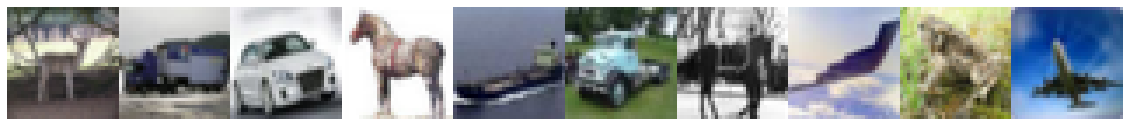

In [27]:
def concat_img(imgs):
    figsize(20,20)
    figure()
    imgs = (imgs + 1) / 2
    imgs = imgs.movedim((0, 1, 2, 3), (0, 3, 1, 2)).detach().cpu().numpy() 
    axs = imshow(np.concatenate(imgs.tolist(), axis=1))
    plt.axis('off')
    plt.show()
img, _ = next(iter(loader))
concat_img(img[:10])